In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [2]:
data=pd.read_csv("C:/Users/chandrashekar/Desktop/Machine_Learning/Practice/Credit Card/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


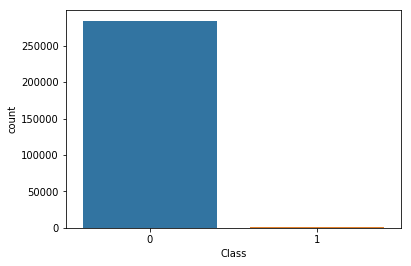

In [4]:
#Seeing the data 
sns.countplot(x="Class",data=data)
# This show data is implaced

In [5]:
#lets check the percentage of the data
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


In [6]:
#Doing Feature scaling
from sklearn.preprocessing import StandardScaler

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


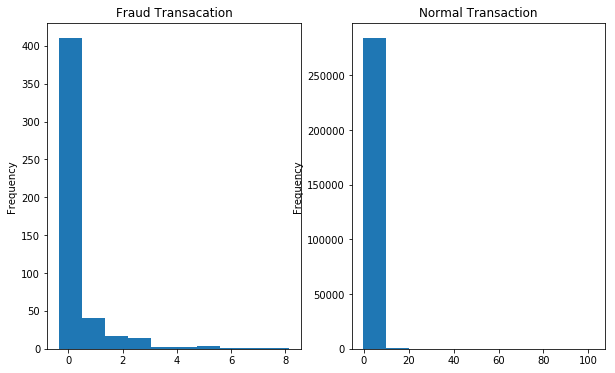

In [7]:
#Lets plot the transactions
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

In [8]:
#As it is implaced data we need to do undersampling or oversampling
#Undersampling
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
def undersample(normal_indices,fraud_indices,times):
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [15]:
#For an imbalanced data model selection and model performance is evaluated by the Confusion matrix and pression / by classification report

def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    
    #calculate the probability for each class
    probs=clf.predict_proba(features_test)
    #take only the positive class probabilitues
    preds=probs[:,1]
    #roc.curve returs fpr,tpr
    fpr,tpr,threshold=metrics.roc_curve(labels_test,preds)
    #area under the curve
    roc_auc=metrics.auc(fpr,tpr)
    #normal plot
    plt.plot(fpr,tpr)
    print(roc_auc)

In [10]:
# Spliting the data into train and test set
def data_prepration(x): 
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

-------------------------------------------
C parameter:  0.01
-------------------------------------------

the recall for this model is : 0.9375
TP 135
TN 133
FP 19
FN 9


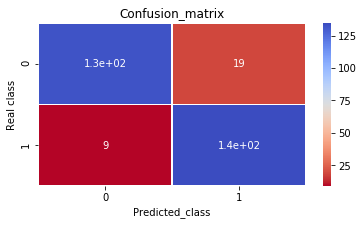


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.88      0.90       152
          1       0.88      0.94      0.91       144

avg / total       0.91      0.91      0.91       296

0.977384868421
the recall for this model is : 0.9375
TP 135
TN 133
FP 19
FN 9


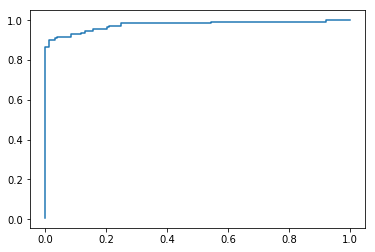

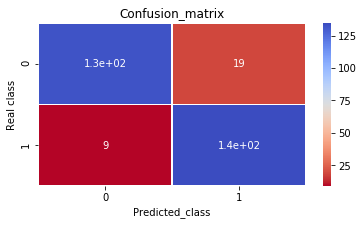


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.88      0.90       152
          1       0.88      0.94      0.91       144

avg / total       0.91      0.91      0.91       296

0.977339181287
the recall for this model is : 0.9375
TP 135
TN 133
FP 19
FN 9


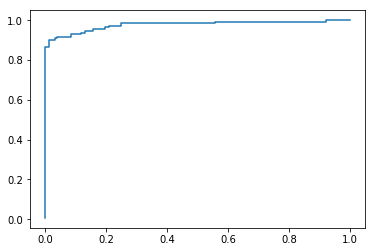

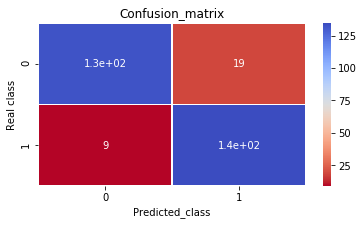


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.88      0.90       152
          1       0.88      0.94      0.91       144

avg / total       0.91      0.91      0.91       296

0.977521929825
the recall for this model is : 0.9375
TP 135
TN 133
FP 19
FN 9


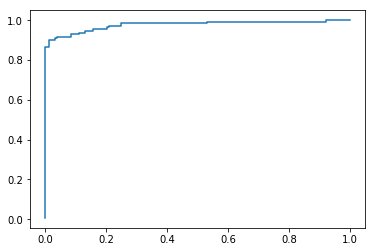

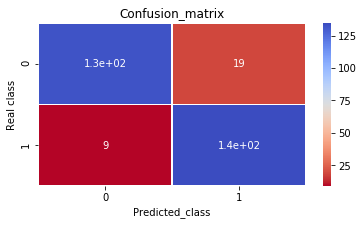


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.88      0.90       152
          1       0.88      0.94      0.91       144

avg / total       0.91      0.91      0.91       296

0.977430555556
the recall for this model is : 0.9375
TP 135
TN 133
FP 19
FN 9


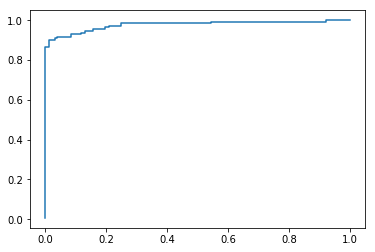

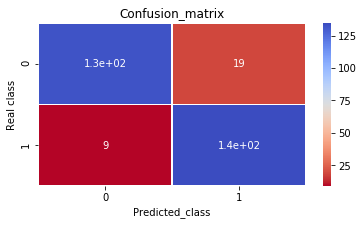


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.88      0.90       152
          1       0.88      0.94      0.91       144

avg / total       0.91      0.91      0.91       296

0.97747624269
-------------------------------------------
C parameter:  0.1
-------------------------------------------

the recall for this model is : 0.916666666667
TP 132
TN 150
FP 2
FN 12


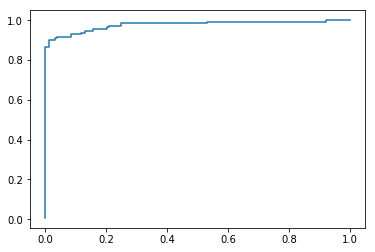

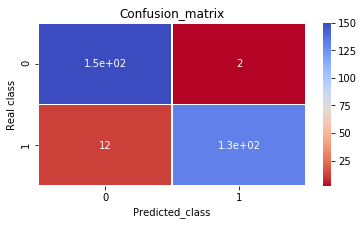


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       152
          1       0.99      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.983050073099
the recall for this model is : 0.916666666667
TP 132
TN 150
FP 2
FN 12


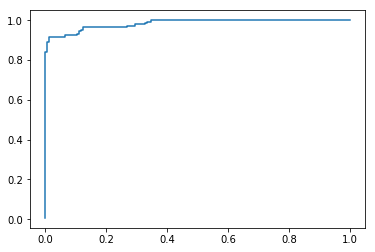

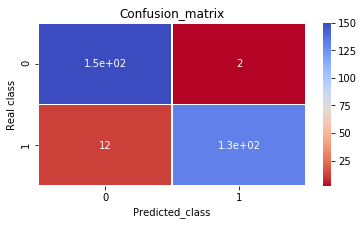


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       152
          1       0.99      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.983050073099
the recall for this model is : 0.916666666667
TP 132
TN 150
FP 2
FN 12


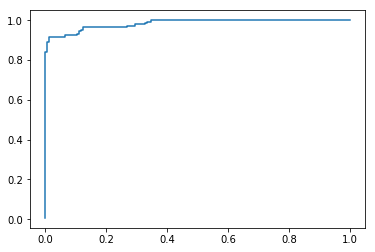

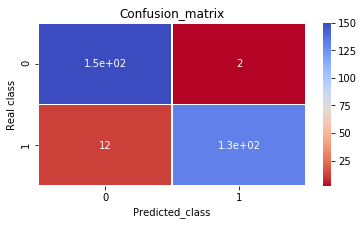


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       152
          1       0.99      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.983004385965
the recall for this model is : 0.916666666667
TP 132
TN 150
FP 2
FN 12


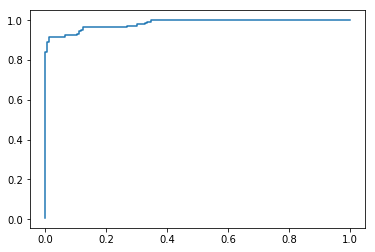

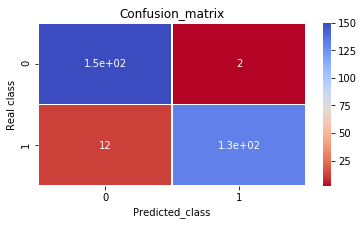


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       152
          1       0.99      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.983050073099
the recall for this model is : 0.916666666667
TP 132
TN 150
FP 2
FN 12


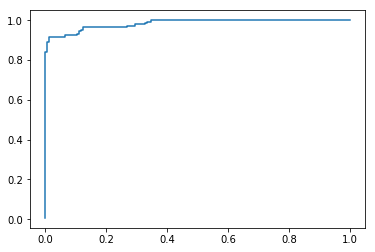

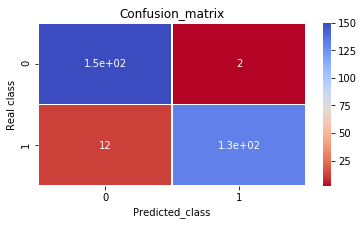


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       152
          1       0.99      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.983004385965
-------------------------------------------
C parameter:  1
-------------------------------------------

the recall for this model is : 0.909722222222
TP 131
TN 148
FP 4
FN 13


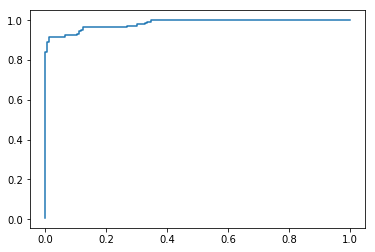

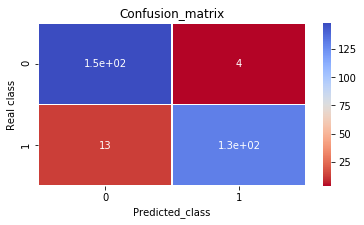


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       152
          1       0.97      0.91      0.94       144

avg / total       0.94      0.94      0.94       296

0.982364766082
the recall for this model is : 0.909722222222
TP 131
TN 148
FP 4
FN 13


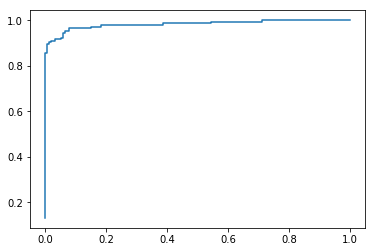

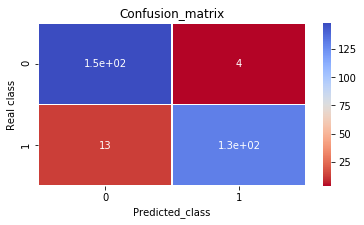


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       152
          1       0.97      0.91      0.94       144

avg / total       0.94      0.94      0.94       296

0.982364766082
the recall for this model is : 0.909722222222
TP 131
TN 148
FP 4
FN 13


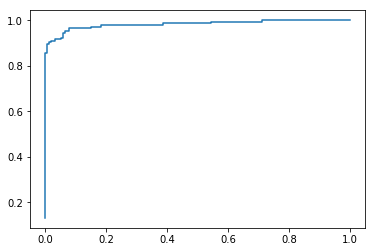

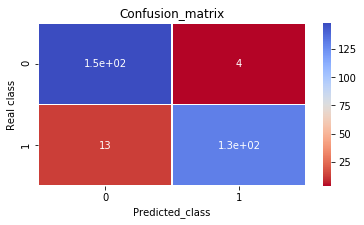


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       152
          1       0.97      0.91      0.94       144

avg / total       0.94      0.94      0.94       296

0.982364766082
the recall for this model is : 0.909722222222
TP 131
TN 148
FP 4
FN 13


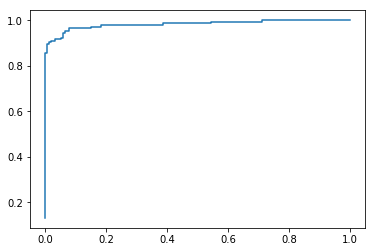

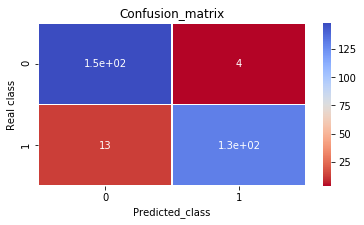


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       152
          1       0.97      0.91      0.94       144

avg / total       0.94      0.94      0.94       296

0.982364766082
the recall for this model is : 0.909722222222
TP 131
TN 148
FP 4
FN 13


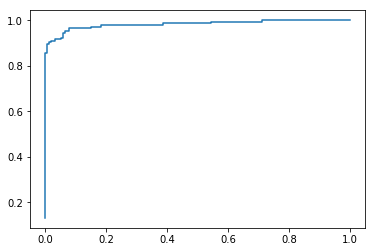

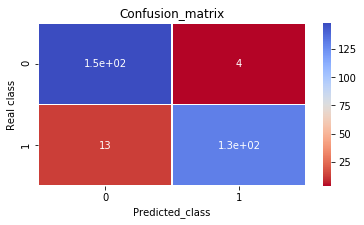


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       152
          1       0.97      0.91      0.94       144

avg / total       0.94      0.94      0.94       296

0.982364766082
-------------------------------------------
C parameter:  10
-------------------------------------------

the recall for this model is : 0.916666666667
TP 132
TN 148
FP 4
FN 12


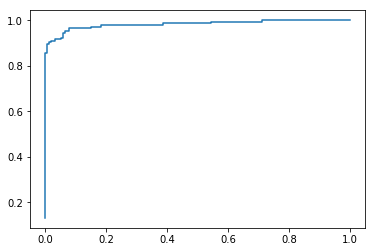

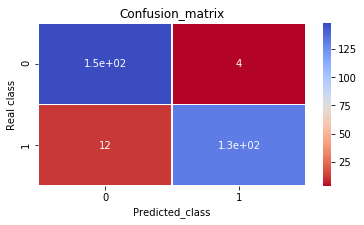


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       152
          1       0.97      0.92      0.94       144

avg / total       0.95      0.95      0.95       296

0.980308845029
the recall for this model is : 0.916666666667
TP 132
TN 148
FP 4
FN 12


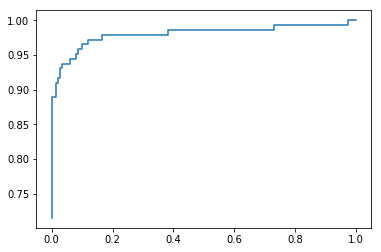

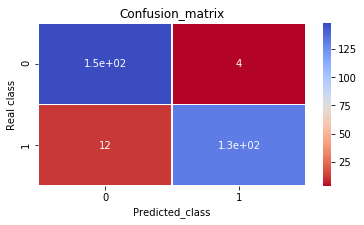


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       152
          1       0.97      0.92      0.94       144

avg / total       0.95      0.95      0.95       296

0.980263157895
the recall for this model is : 0.916666666667
TP 132
TN 148
FP 4
FN 12


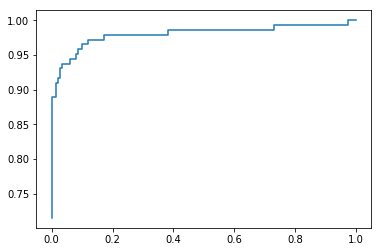

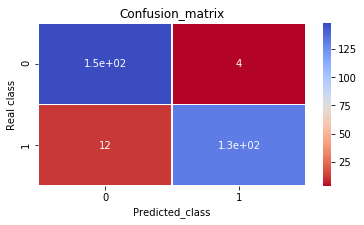


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       152
          1       0.97      0.92      0.94       144

avg / total       0.95      0.95      0.95       296

0.980308845029
the recall for this model is : 0.916666666667
TP 132
TN 148
FP 4
FN 12


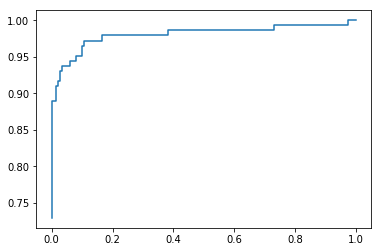

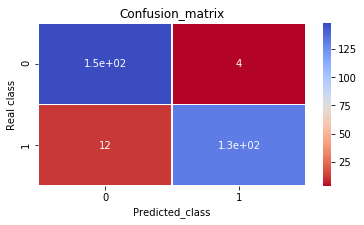


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       152
          1       0.97      0.92      0.94       144

avg / total       0.95      0.95      0.95       296

0.980263157895
the recall for this model is : 0.916666666667
TP 132
TN 148
FP 4
FN 12


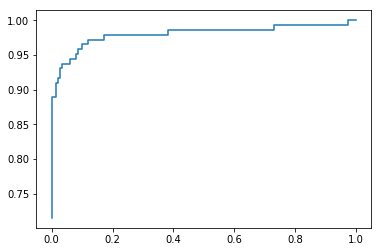

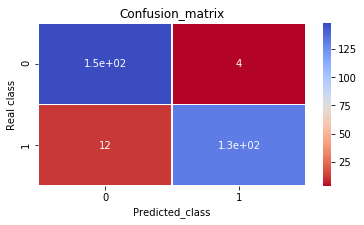


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       152
          1       0.97      0.92      0.94       144

avg / total       0.95      0.95      0.95       296

0.980263157895
-------------------------------------------
C parameter:  100
-------------------------------------------

the recall for this model is : 0.916666666667
TP 132
TN 149
FP 3
FN 12


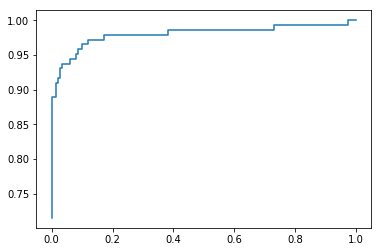

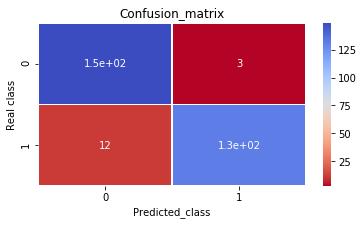


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       152
          1       0.98      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.980582967836
the recall for this model is : 0.916666666667
TP 132
TN 149
FP 3
FN 12


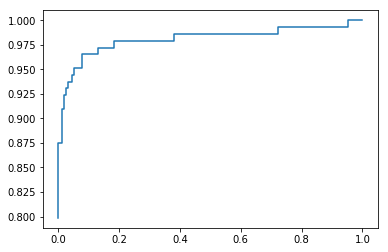

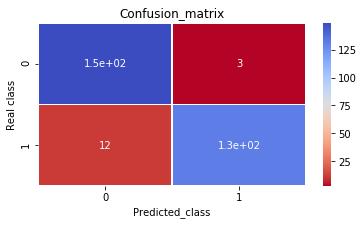


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       152
          1       0.98      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.980582967836
the recall for this model is : 0.916666666667
TP 132
TN 149
FP 3
FN 12


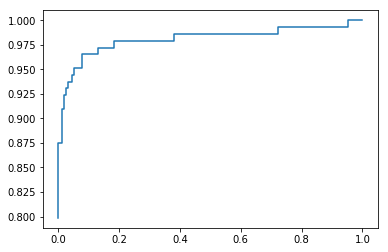

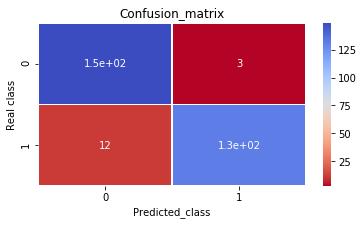


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       152
          1       0.98      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.979532163743
the recall for this model is : 0.916666666667
TP 132
TN 149
FP 3
FN 12


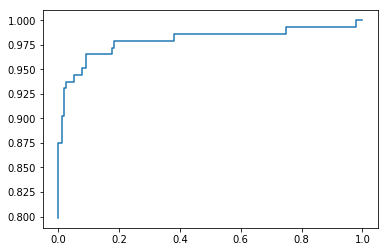

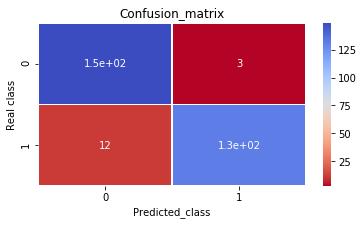


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       152
          1       0.98      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.979577850877
the recall for this model is : 0.916666666667
TP 132
TN 149
FP 3
FN 12


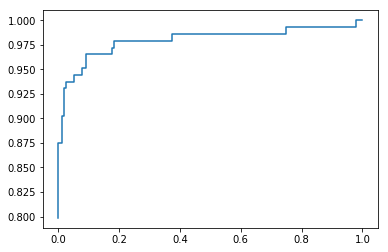

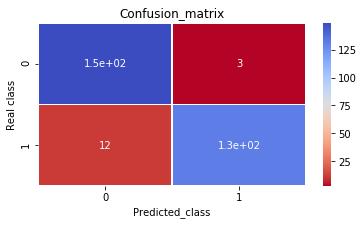


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       152
          1       0.98      0.92      0.95       144

avg / total       0.95      0.95      0.95       296

0.979577850877
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

-------------------------------------------
C parameter:  0.01
-------------------------------------------

the recall for this model is : 0.858108108108
TP 127
TN 291
FP 4
FN 21


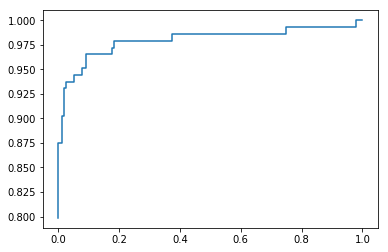

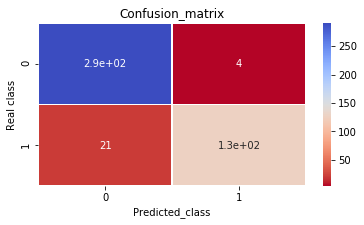


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       295
          1       0.97      0.86      0.91       148

avg / total       0.94      0.94      0.94       443

0.969560238204
the recall for this model is : 0.858108108108
TP 127
TN 291
FP 4
FN 21


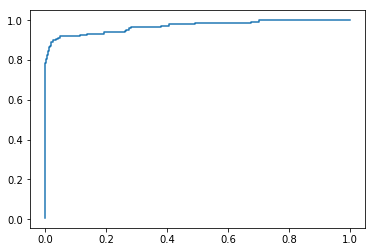

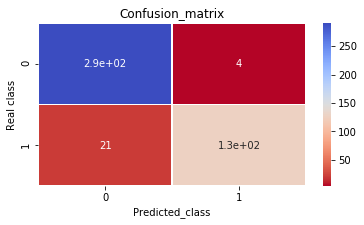


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       295
          1       0.97      0.86      0.91       148

avg / total       0.94      0.94      0.94       443

0.969514429684
the recall for this model is : 0.858108108108
TP 127
TN 291
FP 4
FN 21


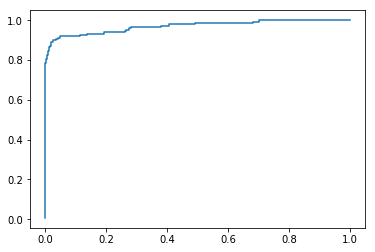

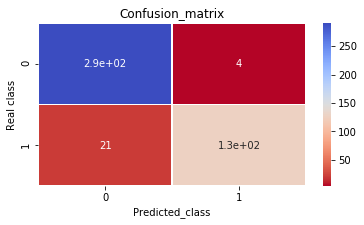


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       295
          1       0.97      0.86      0.91       148

avg / total       0.94      0.94      0.94       443

0.969560238204
the recall for this model is : 0.858108108108
TP 127
TN 291
FP 4
FN 21


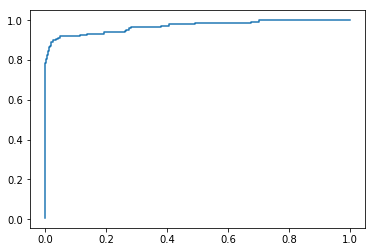

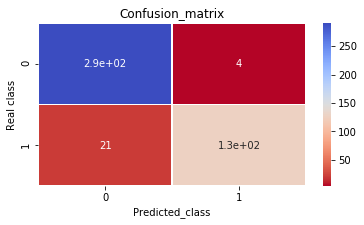


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       295
          1       0.97      0.86      0.91       148

avg / total       0.94      0.94      0.94       443

0.969583142464
the recall for this model is : 0.858108108108
TP 127
TN 291
FP 4
FN 21


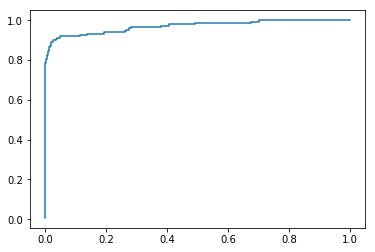

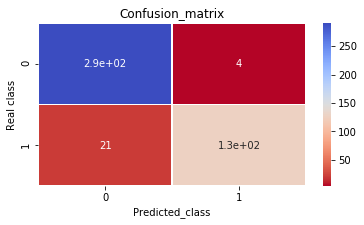


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       295
          1       0.97      0.86      0.91       148

avg / total       0.94      0.94      0.94       443

0.969560238204
-------------------------------------------
C parameter:  0.1
-------------------------------------------

the recall for this model is : 0.871621621622
TP 129
TN 290
FP 5
FN 19


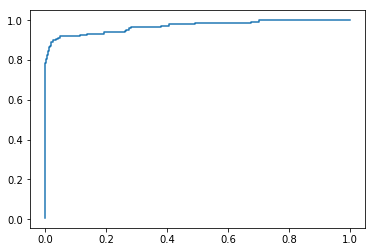

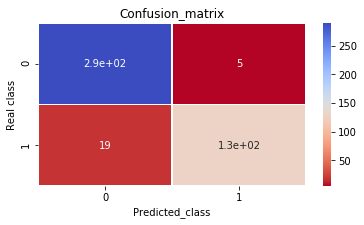


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.87      0.91       148

avg / total       0.95      0.95      0.95       443

0.97975263399
the recall for this model is : 0.871621621622
TP 129
TN 290
FP 5
FN 19


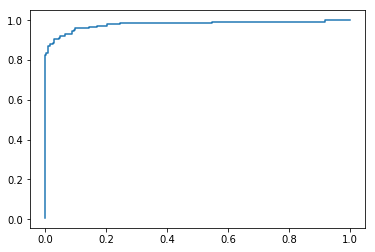

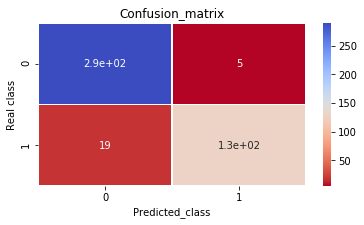


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.87      0.91       148

avg / total       0.95      0.95      0.95       443

0.97975263399
the recall for this model is : 0.871621621622
TP 129
TN 290
FP 5
FN 19


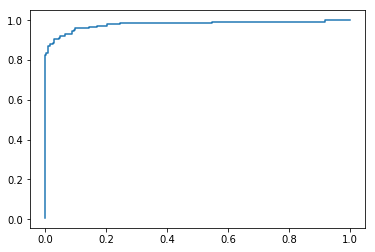

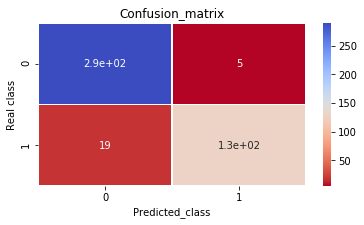


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.87      0.91       148

avg / total       0.95      0.95      0.95       443

0.97977553825
the recall for this model is : 0.871621621622
TP 129
TN 290
FP 5
FN 19


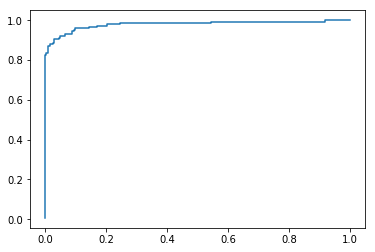

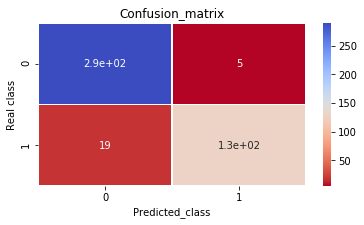


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.87      0.91       148

avg / total       0.95      0.95      0.95       443

0.97970682547
the recall for this model is : 0.871621621622
TP 129
TN 290
FP 5
FN 19


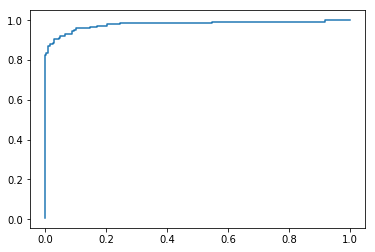

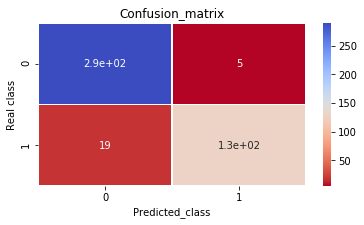


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.87      0.91       148

avg / total       0.95      0.95      0.95       443

0.97975263399
-------------------------------------------
C parameter:  1
-------------------------------------------

the recall for this model is : 0.885135135135
TP 131
TN 289
FP 6
FN 17


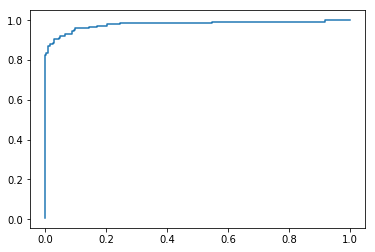

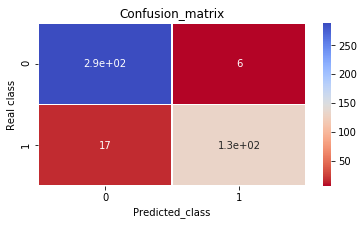


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980279431974
the recall for this model is : 0.885135135135
TP 131
TN 289
FP 6
FN 17


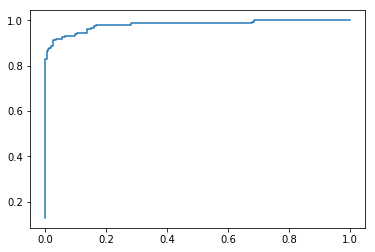

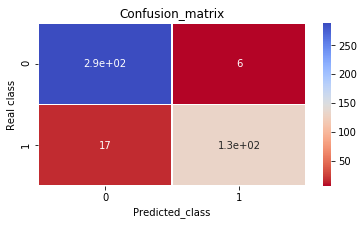


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980279431974
the recall for this model is : 0.885135135135
TP 131
TN 289
FP 6
FN 17


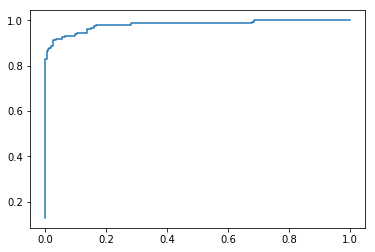

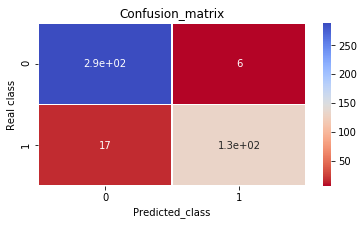


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980302336235
the recall for this model is : 0.885135135135
TP 131
TN 289
FP 6
FN 17


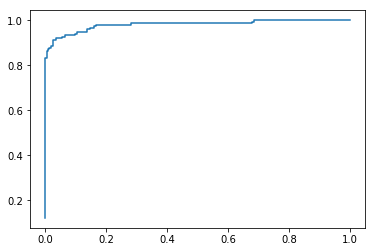

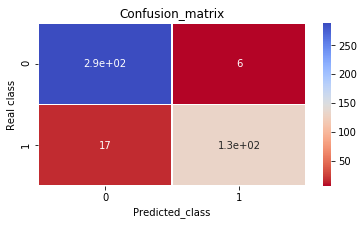


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980279431974
the recall for this model is : 0.885135135135
TP 131
TN 289
FP 6
FN 17


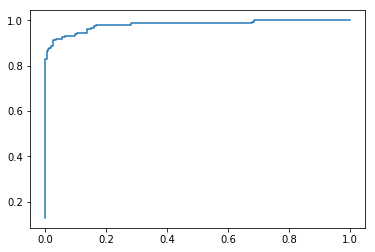

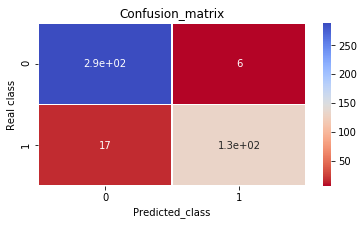


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980279431974
-------------------------------------------
C parameter:  10
-------------------------------------------

the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


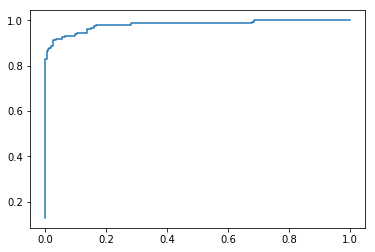

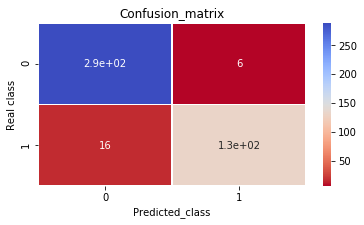


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980485570316
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


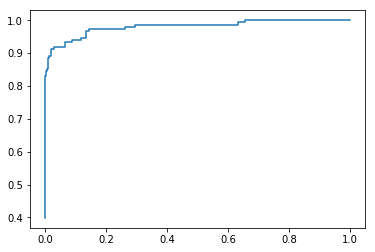

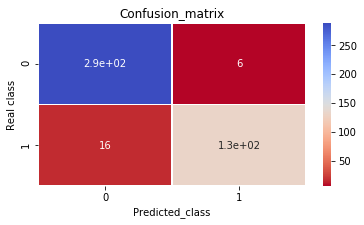


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980485570316
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


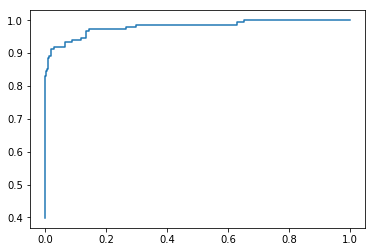

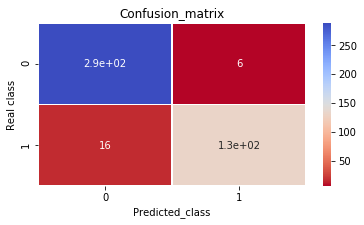


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980462666056
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


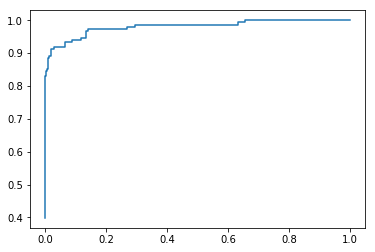

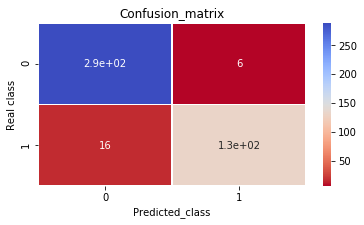


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980508474576
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


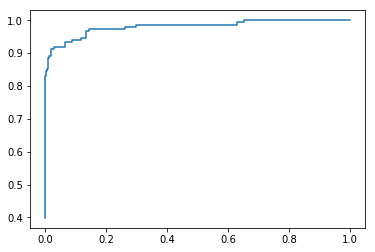

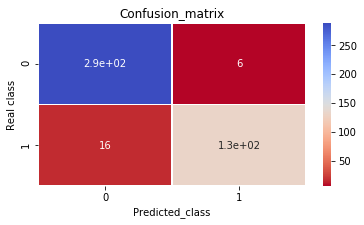


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.980462666056
-------------------------------------------
C parameter:  100
-------------------------------------------

the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


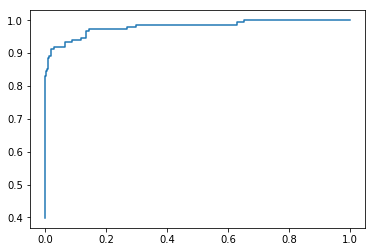

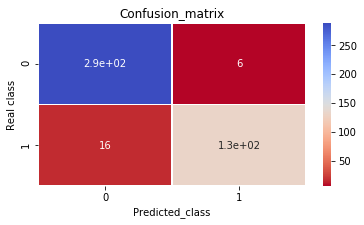


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.981103985341
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


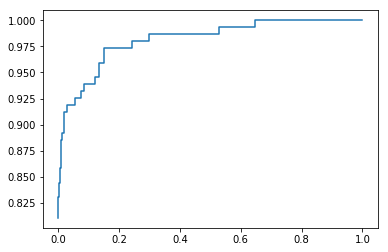

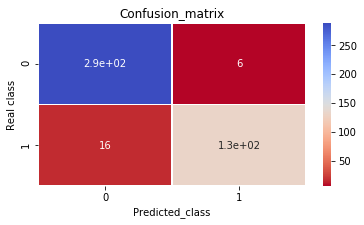


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.981081081081
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


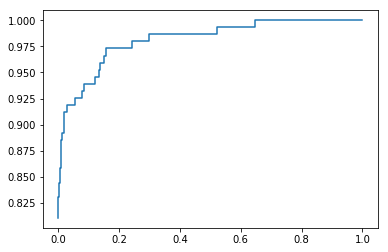

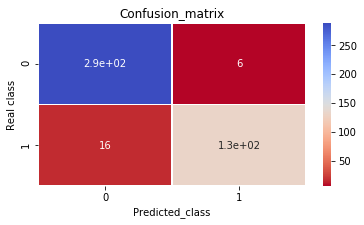


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.981172698122
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


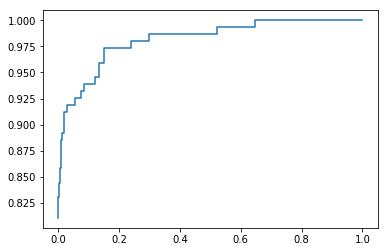

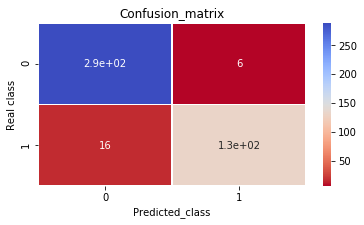


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.981195602382
the recall for this model is : 0.891891891892
TP 132
TN 289
FP 6
FN 16


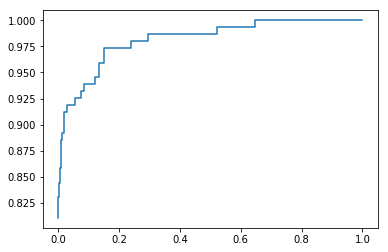

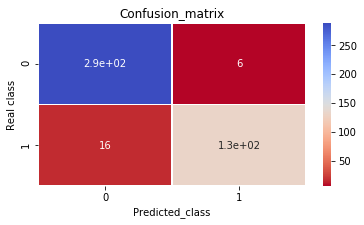


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       295
          1       0.96      0.89      0.92       148

avg / total       0.95      0.95      0.95       443

0.981103985341
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

-------------------------------------------
C parameter:  0.01
-------------------------------------------

the recall for this model is : 0.862275449102
TP 144
TN 421
FP 3
FN 23


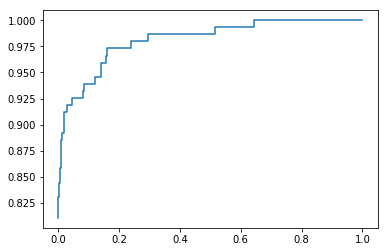

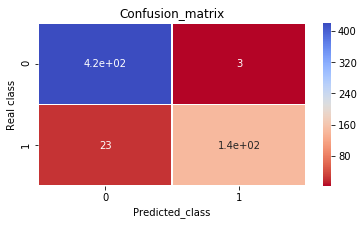


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.98      0.86      0.92       167

avg / total       0.96      0.96      0.96       591

0.97288441984
the recall for this model is : 0.862275449102
TP 144
TN 421
FP 3
FN 23


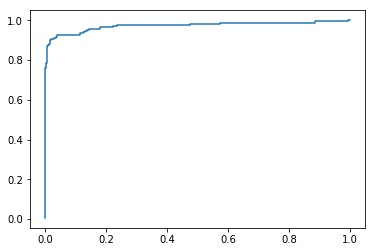

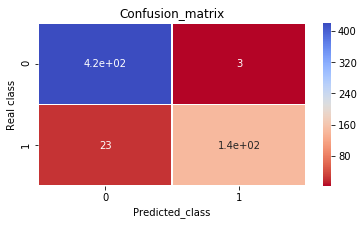


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.98      0.86      0.92       167

avg / total       0.96      0.96      0.96       591

0.972912665236
the recall for this model is : 0.862275449102
TP 144
TN 421
FP 3
FN 23


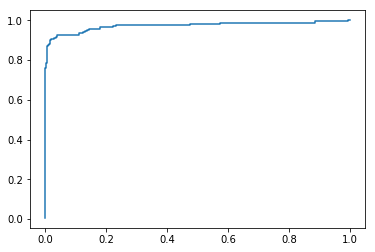

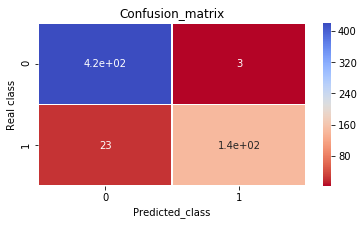


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.98      0.86      0.92       167

avg / total       0.96      0.96      0.96       591

0.97288441984
the recall for this model is : 0.862275449102
TP 144
TN 421
FP 3
FN 23


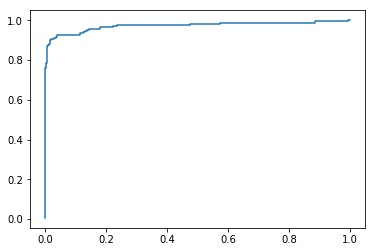

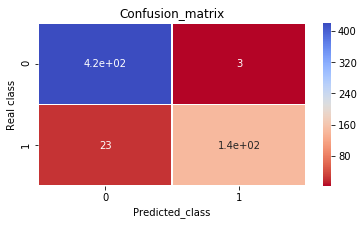


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.98      0.86      0.92       167

avg / total       0.96      0.96      0.96       591

0.97288441984
the recall for this model is : 0.862275449102
TP 144
TN 421
FP 3
FN 23


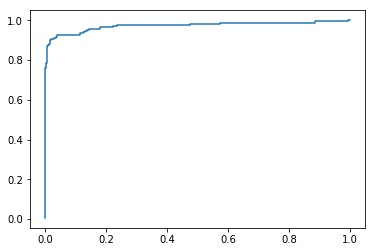

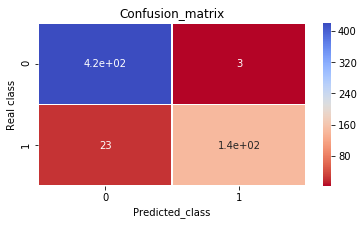


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.98      0.86      0.92       167

avg / total       0.96      0.96      0.96       591

0.97288441984
-------------------------------------------
C parameter:  0.1
-------------------------------------------

the recall for this model is : 0.880239520958
TP 147
TN 420
FP 4
FN 20


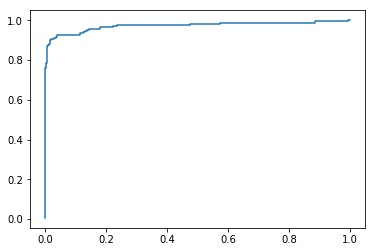

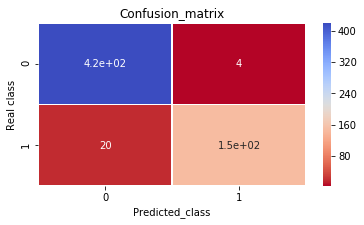


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.97      0.88      0.92       167

avg / total       0.96      0.96      0.96       591

0.978660603322
the recall for this model is : 0.880239520958
TP 147
TN 420
FP 4
FN 20


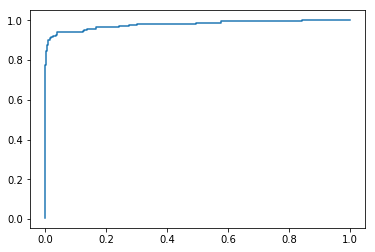

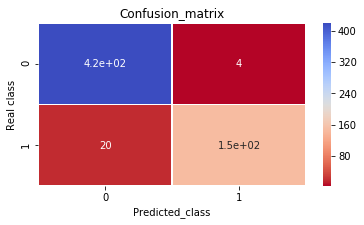


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.97      0.88      0.92       167

avg / total       0.96      0.96      0.96       591

0.978660603322
the recall for this model is : 0.880239520958
TP 147
TN 420
FP 4
FN 20


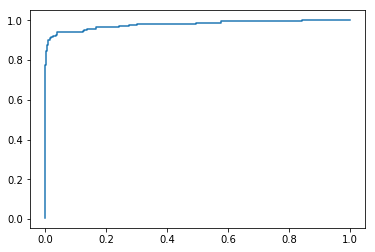

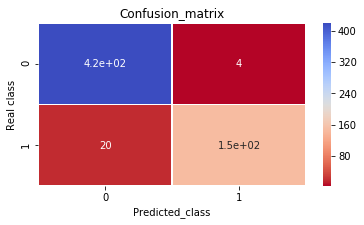


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.97      0.88      0.92       167

avg / total       0.96      0.96      0.96       591

0.978660603322
the recall for this model is : 0.880239520958
TP 147
TN 420
FP 4
FN 20


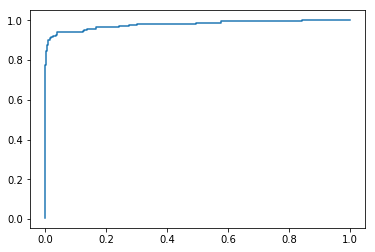

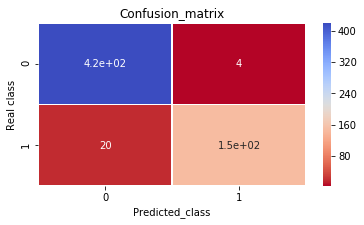


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.97      0.88      0.92       167

avg / total       0.96      0.96      0.96       591

0.978660603322
the recall for this model is : 0.880239520958
TP 147
TN 420
FP 4
FN 20


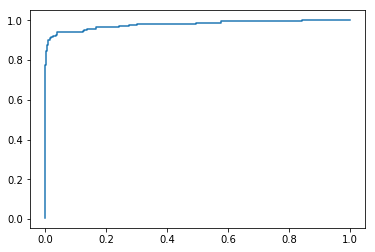

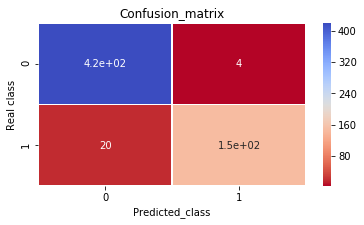


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       424
          1       0.97      0.88      0.92       167

avg / total       0.96      0.96      0.96       591

0.978660603322
-------------------------------------------
C parameter:  1
-------------------------------------------

the recall for this model is : 0.892215568862
TP 149
TN 419
FP 5
FN 18


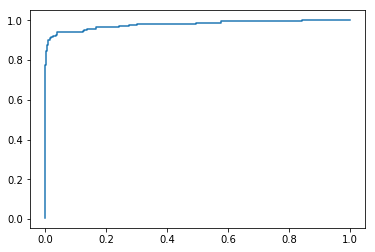

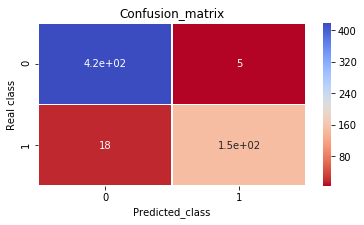


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       424
          1       0.97      0.89      0.93       167

avg / total       0.96      0.96      0.96       591

0.977516664784
the recall for this model is : 0.892215568862
TP 149
TN 419
FP 5
FN 18


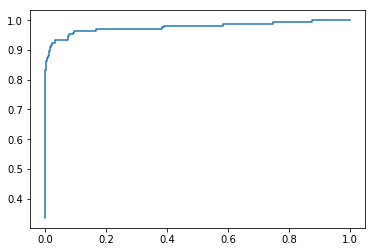

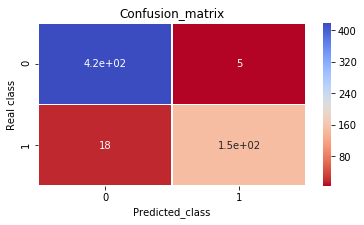


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       424
          1       0.97      0.89      0.93       167

avg / total       0.96      0.96      0.96       591

0.977516664784
the recall for this model is : 0.892215568862
TP 149
TN 419
FP 5
FN 18


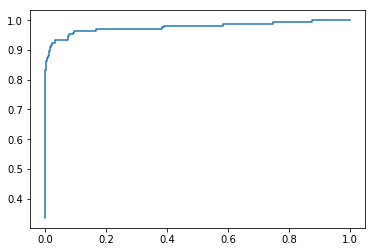

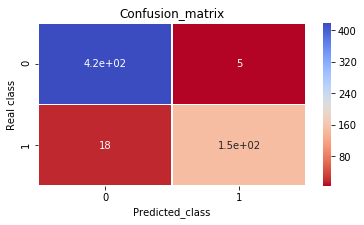


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       424
          1       0.97      0.89      0.93       167

avg / total       0.96      0.96      0.96       591

0.977516664784
the recall for this model is : 0.892215568862
TP 149
TN 419
FP 5
FN 18


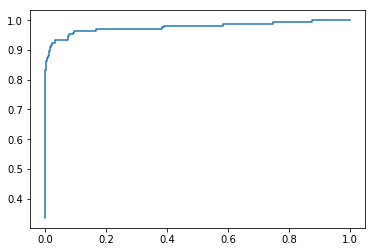

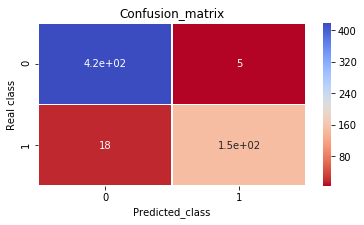


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       424
          1       0.97      0.89      0.93       167

avg / total       0.96      0.96      0.96       591

0.977516664784
the recall for this model is : 0.892215568862
TP 149
TN 419
FP 5
FN 18


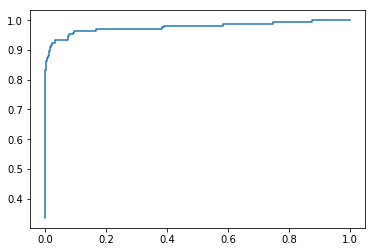

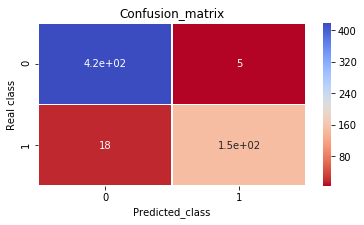


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       424
          1       0.97      0.89      0.93       167

avg / total       0.96      0.96      0.96       591

0.977516664784
-------------------------------------------
C parameter:  10
-------------------------------------------

the recall for this model is : 0.904191616766
TP 151
TN 419
FP 5
FN 16


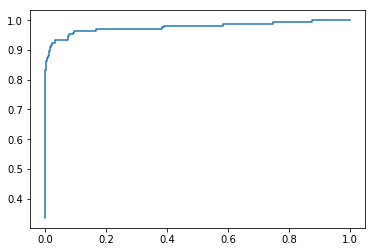

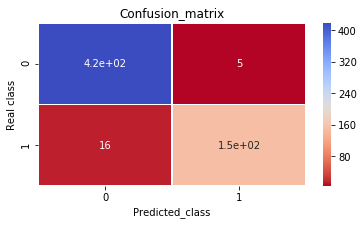


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       424
          1       0.97      0.90      0.93       167

avg / total       0.96      0.96      0.96       591

0.976330358152
the recall for this model is : 0.904191616766
TP 151
TN 419
FP 5
FN 16


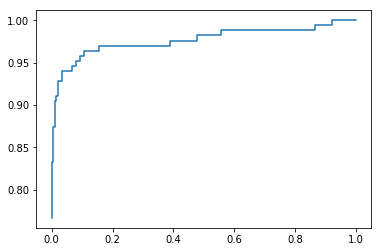

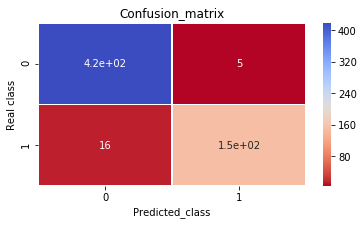


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       424
          1       0.97      0.90      0.93       167

avg / total       0.96      0.96      0.96       591

0.976330358152
the recall for this model is : 0.904191616766
TP 151
TN 419
FP 5
FN 16


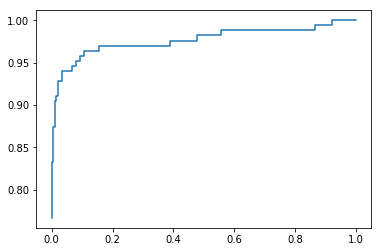

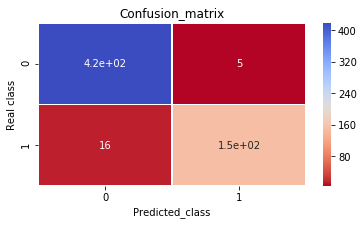


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       424
          1       0.97      0.90      0.93       167

avg / total       0.96      0.96      0.96       591

0.976330358152
the recall for this model is : 0.904191616766
TP 151
TN 419
FP 5
FN 16


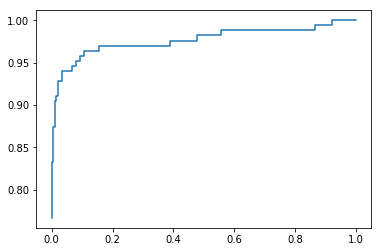

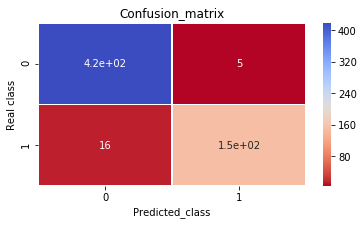


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       424
          1       0.97      0.90      0.93       167

avg / total       0.96      0.96      0.96       591

0.976330358152
the recall for this model is : 0.904191616766
TP 151
TN 419
FP 5
FN 16


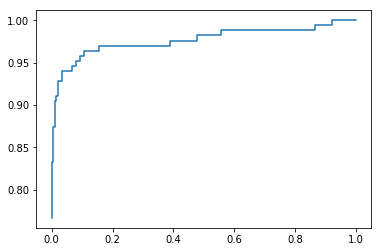

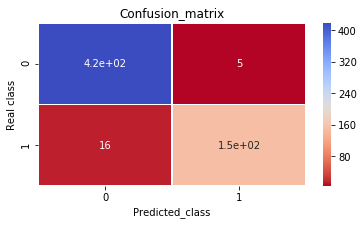


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       424
          1       0.97      0.90      0.93       167

avg / total       0.96      0.96      0.96       591

0.976302112756
-------------------------------------------
C parameter:  100
-------------------------------------------

the recall for this model is : 0.910179640719
TP 152
TN 420
FP 4
FN 15


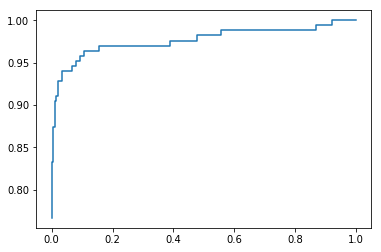

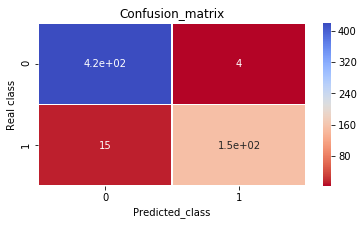


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       424
          1       0.97      0.91      0.94       167

avg / total       0.97      0.97      0.97       591

0.977516664784
the recall for this model is : 0.910179640719
TP 152
TN 420
FP 4
FN 15


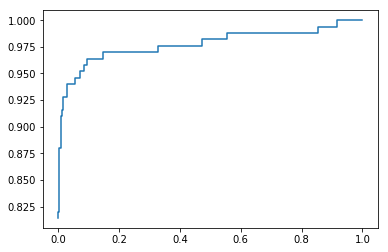

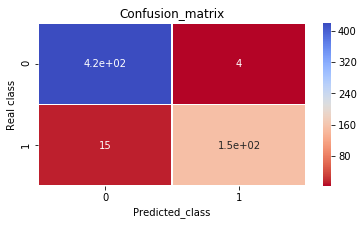


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       424
          1       0.97      0.91      0.94       167

avg / total       0.97      0.97      0.97       591

0.977502542086
the recall for this model is : 0.910179640719
TP 152
TN 420
FP 4
FN 15


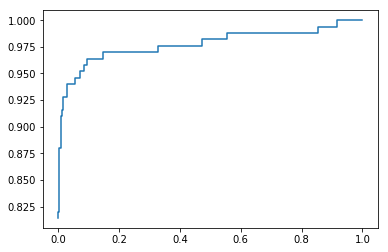

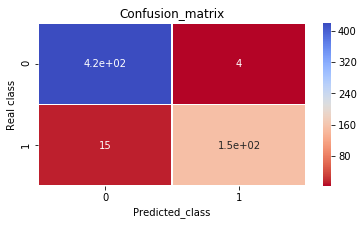


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       424
          1       0.97      0.91      0.94       167

avg / total       0.97      0.97      0.97       591

0.977516664784
the recall for this model is : 0.910179640719
TP 152
TN 420
FP 4
FN 15


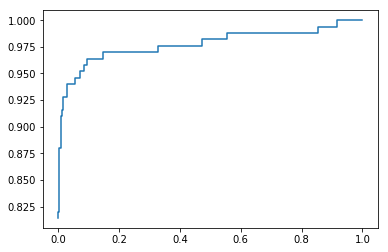

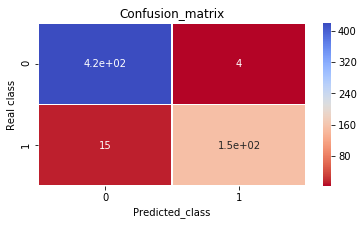


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       424
          1       0.97      0.91      0.94       167

avg / total       0.97      0.97      0.97       591

0.977516664784
the recall for this model is : 0.910179640719
TP 152
TN 420
FP 4
FN 15


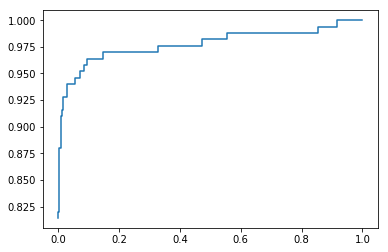

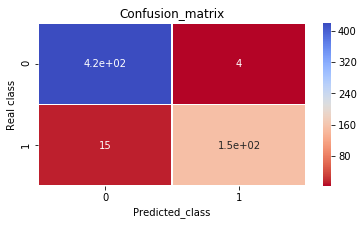


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       424
          1       0.97      0.91      0.94       167

avg / total       0.97      0.97      0.97       591

0.977516664784


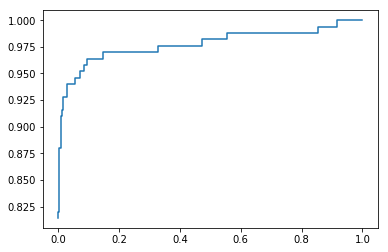

In [16]:
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    fold = KFold(len(undersample_labels_train),5,shuffle=False) 
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

    
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')


            model(lr,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

the recall for this model is : 0.986486486486
TP 146
TN 54
FP 94
FN 2


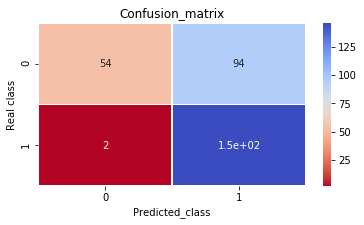


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.36      0.53       148
          1       0.61      0.99      0.75       148

avg / total       0.79      0.68      0.64       296

0.9628834916
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.0
TP 0
TN 285
FP 0
FN 158


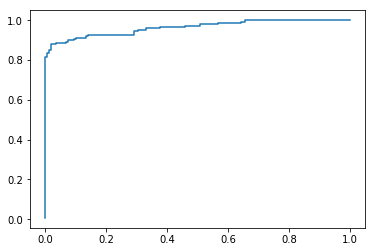

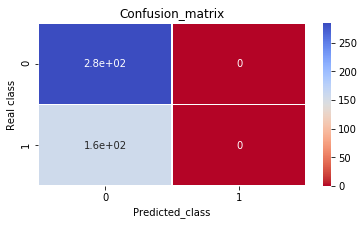


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.64      1.00      0.78       285
          1       0.00      0.00      0.00       158

avg / total       0.41      0.64      0.50       443

0.958583166778
the undersample data for 3 proportion

the normal transacation proportion is :

C:\Users\chandrashekar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.0
TP 0
TN 440
FP 0
FN 151


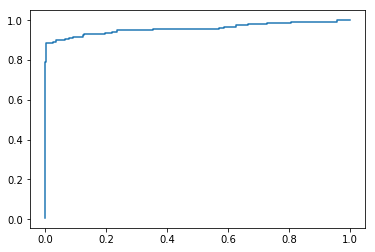

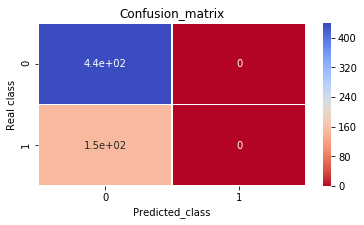


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       440
          1       0.00      0.00      0.00       151

avg / total       0.55      0.74      0.64       591

0.968497892836


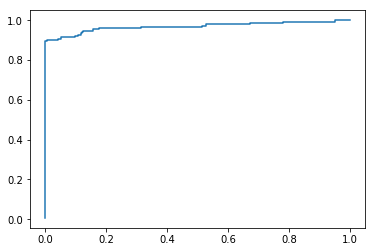

In [21]:

for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    svc= SVC(C= 0.05,gamma=0.1,probability=True)
    model(svc,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)

In [23]:
# Oversampling Data
for i in range (365): # the number is choosen by myself on basis of nnumber of fraud transaction
    Normal_transacation= Normal_transacation.append(Fraud_transacation)
os_data = Normal_transacation.copy() 
print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  463895
Number of normal transcation in oversampled data 284315
No.of fraud transcation 179580
Proportion of Normal data in oversampled data is  0.6128865368240658
Proportion of fraud data in oversampled data is  0.3871134631759342


length of training data
324726
length of test data
139169
the recall for this model is : 1.0
TP 53752
TN 85408
FP 9
FN 0


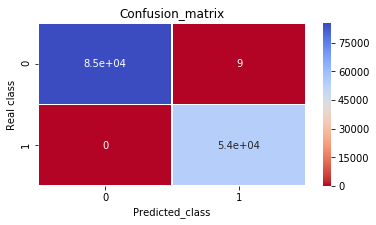


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85417
          1       1.00      1.00      1.00     53752

avg / total       1.00      1.00      1.00    139169

0.999982439093


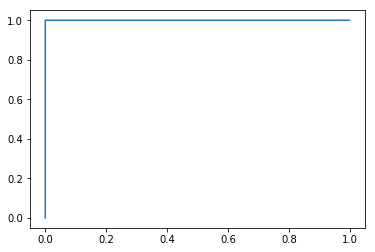

In [27]:
#Radom Forest on oVersampling
os_train_X,os_test_X,os_train_y,os_test_y=data_prepration(os_data)
clf= RandomForestClassifier(n_estimators=10)
model(clf,os_train_X,os_test_X,os_train_y,os_test_y)

In [28]:
#SMOTE
smo = SMOTE(random_state=0)
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
smo_data_X,smo_data_y=smo.fit_sample(data_train_X,data_train_y)
clf= RandomForestClassifier(n_estimators=10)
# train data using oversampled data and predict for the test data
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

NameError: name 'SMOTE' is not defined